### The project about :
##### [exploratory data analysis (EDA) on Airbnb listings data for a Chicago city]
#### Table of content
* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Conclusions
##### Introduction
###### Dataset Description
###### This dataset about airbnb listings for a Chicago city,there are factors such as price, availability, location, and property type to identify trends and patterns in the demand for Airbnb listings in this city.

In [1]:
#import packages that we use

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
#load dataset 

df1=pd.read_csv('listings.csv')
df=df1.copy()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,129,3,220,2023-06-10,2.14,1,350,19,NaN
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,94,32,493,2023-05-28,2.90,1,295,44,R21000075737
2,2907500,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · ...,11231030,Erik,NaN,West Lawn,41.78225,-87.72806,Private room,39,1,335,2023-05-31,3.11,2,196,6,NaN
3,755701,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Vas,NaN,Logan Square,41.93115,-87.71836,Entire home/apt,100,32,27,2022-12-01,0.22,4,198,3,City registration pending
4,10945,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,219,4,66,2023-06-07,0.59,7,94,19,2209984


In [3]:
df.shape

(8024, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8024 non-null   int64  
 1   name                            8024 non-null   object 
 2   host_id                         8024 non-null   int64  
 3   host_name                       8024 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8024 non-null   object 
 6   latitude                        8024 non-null   float64
 7   longitude                       8024 non-null   float64
 8   room_type                       8024 non-null   object 
 9   price                           8024 non-null   int64  
 10  minimum_nights                  8024 non-null   int64  
 11  number_of_reviews               8024 non-null   int64  
 12  last_review                     64

In [5]:
# data types of each column
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [6]:
# columns name in dataset 
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8024.0,3.135320e+17,3.734884e+17,2384.000000,3.366225e+07,5.121381e+07,7.145524e+17,9.154715e+17
host_id,8024.0,1.679340e+08,1.585120e+08,2153.000000,3.327857e+07,1.074344e+08,2.679861e+08,5.203376e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,8024.0,4.189424e+01,6.176227e-02,41.646767,4.186706e+01,4.189742e+01,4.193724e+01,4.202220e+01
longitude,8024.0,-8.766269e+01,4.376192e-02,-87.847243,-8.768621e+01,-8.765794e+01,-8.763172e+01,-8.752954e+01
price,8024.0,2.141533e+02,2.909683e+02,0.000000,9.300000e+01,1.500000e+02,2.400000e+02,1.000000e+04
minimum_nights,8024.0,1.560082e+01,4.298673e+01,1.000000,2.000000e+00,2.000000e+00,3.200000e+01,1.125000e+03
number_of_reviews,8024.0,4.611790e+01,8.762455e+01,0.000000,1.000000e+00,1.400000e+01,5.300000e+01,3.194000e+03
reviews_per_month,6460.0,1.878774e+00,1.870660e+00,0.010000,5.200000e-01,1.520000e+00,2.770000e+00,5.714000e+01
calculated_host_listings_count,8024.0,6.157453e+01,1.774246e+02,1.000000,1.000000e+00,3.000000e+00,1.600000e+01,6.550000e+02


## Data cleaning

#### Q1:check missing values on each columns?

In [8]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               8024
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1564
reviews_per_month                 1564
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2471
dtype: int64

###### Insight:There are missing values in neighbourhood_group,last_review,reviews_per_month,license

##### Q2: IS there duplicated rows in dataset ?

In [9]:
# check dublicated values 
df.duplicated().sum()

0

###### Insight: No duplicated values in dataset

##### Fill missing values and drop columns that not use in this analysis

In [10]:
# df=df.drop(['id','host_name','neighbourhood_group','last_review'],axis=1,inplace=True)
df=df.drop(['id','host_name','neighbourhood_group','last_review'],axis=1)

In [11]:
df.head()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Hyde Park,41.78790,-87.58780,Private room,129,3,220,2.14,1,350,19,NaN
1,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,West Town,41.90166,-87.68021,Entire home/apt,94,32,493,2.90,1,295,44,R21000075737
2,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · ...,11231030,West Lawn,41.78225,-87.72806,Private room,39,1,335,3.11,2,196,6,NaN
3,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Logan Square,41.93115,-87.71836,Entire home/apt,100,32,27,0.22,4,198,3,City registration pending
4,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,Lincoln Park,41.91196,-87.63981,Entire home/apt,219,4,66,0.59,7,94,19,2209984


In [12]:
df.drop(['license'],axis=1,inplace=True)

In [13]:
# df['reviews_per_month'].fillna(0,inplace=True)

# df['reviews_per_month'].fillna(0)
df['reviews_per_month'].fillna(0,inplace=True)
df.isna().sum()

name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

#### Insight:
* check missing values and duplicated values 
* fill missing values and drop columns that not use it in this analysis 
* neighbourhood_group column with only missing values so that i drop it
* drop id,host_name,last_review columns because i not use them in this analysis
* Now ,Data is cleaned and ready for Data analysis and Data visulaization

In [14]:
df.dtypes

name                               object
host_id                             int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [15]:
# # python -m pip install pandas_profiling
# !pip install -U pandas-profiling
# # from pandas_profiling import ProfileReport

In [16]:
# pip install "pydantic==1.*"

In [17]:
# import ydata_profiling

In [18]:
# from ydata_profiling import ProfileReport

In [19]:
# ProfileReport(df)

## Exploratory Data Analysis

C:\Users\XPS 9560\AppData\Local\Temp\ipykernel_9044\3071373054.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

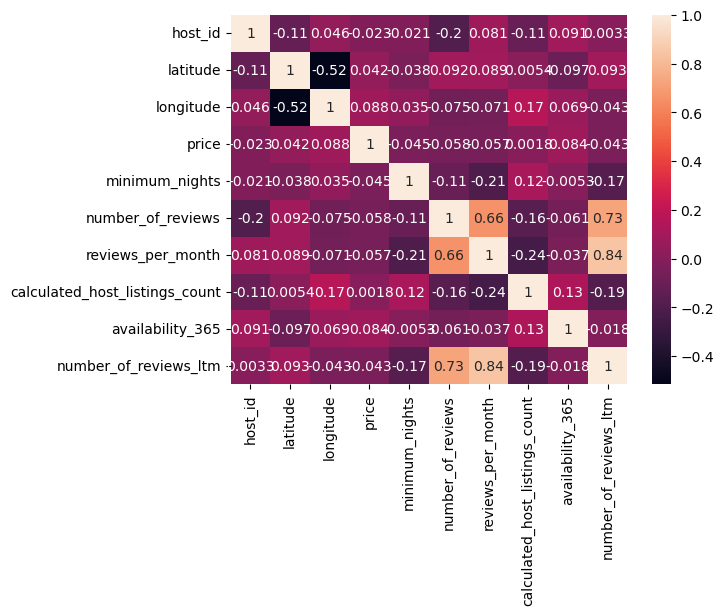

In [15]:
# make correlation matrix on data frame to show relationship between columns only numerical  
figsize=(15,15)
sns.heatmap(df.corr(),annot=True)

###### Numerical features :univariante

### Q: what the average of price ?

In [16]:
df['price'].mean()

214.15329012961118

#### Q: what the highest of price ?

In [17]:
df['price'].max()

10000

#### Q: what the lowest of price ?

In [18]:
df['price'].min()

0

#### Where are the most prices?

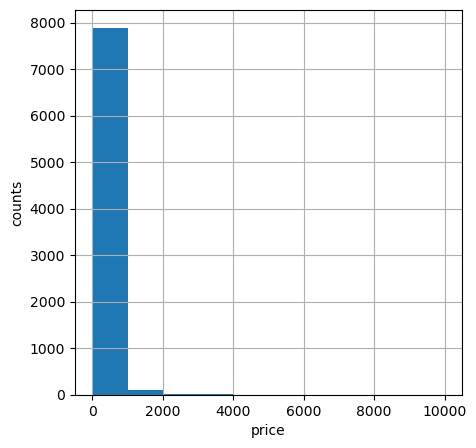

In [19]:
df['price'].hist(figsize=(5,5))
plt.xlabel('price')
plt.ylabel('counts')
plt.show()

##### Insight:
* most prices between 0 and 1000 
* maximum price is 10000 and minimum is 0
* average of prices is 214.15329012961118

#### Q: what the average ,highest and lowest of latitude  ?

In [20]:
df['latitude'].mean()

41.89424342383246

In [21]:
df['latitude'].max()

42.0222

In [22]:
df['latitude'].min()

41.64676712320157

In [25]:
# df['latitude'].hist(figsize=(5,5))
# plt.xlabel('latitude')
# plt.ylabel('counts')
# plt.show()

### Q:what the distribution of latitude values? 

<Axes: xlabel='latitude', ylabel='Density'>

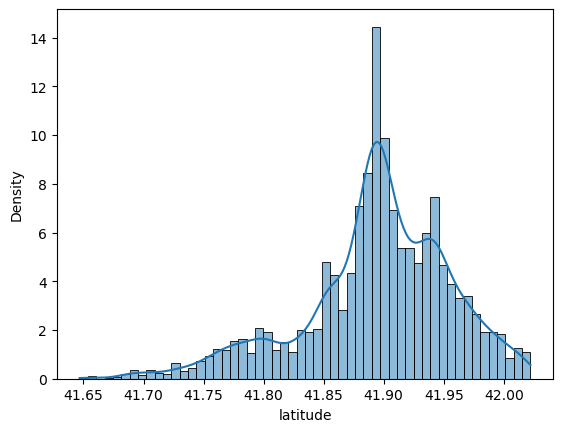

In [23]:
sns.histplot(df['latitude'] ,kde=True, stat="density")

#### Insight: 
* observing normal distribution of latitude
* maximum values of latitude is 42.0222
* minimum values of latitude is 41.64676712320157
* average of latitude is 41.89424342383246
* observe yhe most values of latitude from 41 to 42


##### Q: what the average ,highest and lowest of longitude ?

In [24]:
df['longitude'].mean()

-87.66268811743203

In [25]:
df['longitude'].max()

-87.5295414

In [26]:
df['longitude'].min()

-87.84724300287104

##### Q:what the distribution of llongitude values?

<Axes: xlabel='longitude', ylabel='Density'>

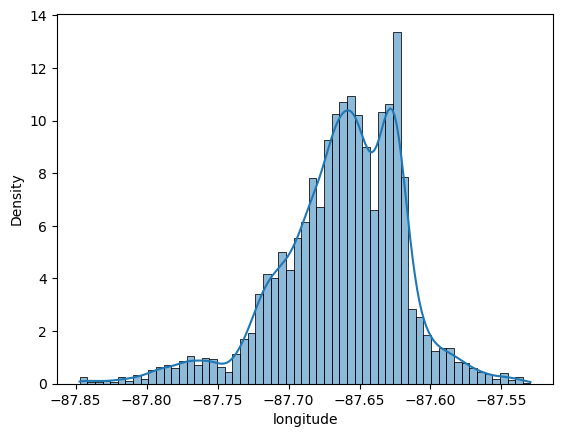

In [27]:
sns.histplot(df['longitude'] ,kde=True, stat="density")

#### Insight: 
* observing normal distribution of longitude
* observe  longitude with negative values
* maximum values of longitude is -87.5295414
* minimum values of longitude is -87.84724300287104
* average of longitude is -87.66268811743203
* observe the most values of longitude from -87.60 to  -87.75

##### Q: what the average ,highest and lowest of minimum_nights ?

In [28]:
df['minimum_nights'].mean()

15.600822532402791

In [29]:
df['minimum_nights'].max()

1125

In [30]:
df['minimum_nights'].min()

1

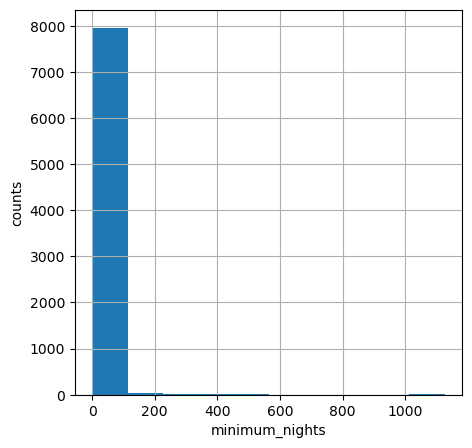

In [31]:
df['minimum_nights'].hist(figsize=(5,5))
plt.xlabel('minimum_nights')
plt.ylabel('counts')
plt.show()

##### Insight:
* maximum values of minimum_nights is 1125
* minimum values of minimum_nights is 1
* average of minimum_nights is 15.600822532402791
* observe the most values of minimum_nights from 1 to 100

#### Q:what the average ,highest and lowest of number_of_reviews ?

In [32]:
df['number_of_reviews'].mean()

46.1178963110668

In [33]:
df['number_of_reviews'].max()

3194

In [34]:
df['number_of_reviews'].min()

0

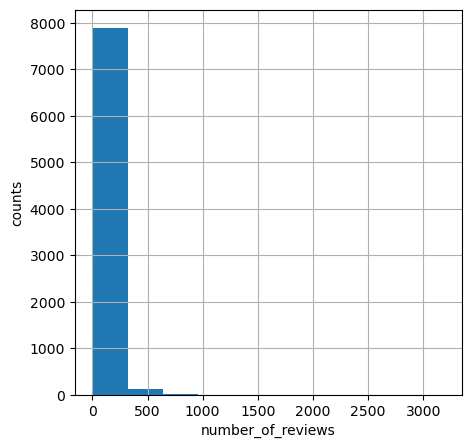

In [35]:
df['number_of_reviews'].hist(figsize=(5,5))
plt.xlabel('number_of_reviews')
plt.ylabel('counts')
plt.show()

##### Insight:
* maximum values of number_of_reviews is 3194
* minimum values of number_of_reviews is 0
* average of number_of_reviews is 46.1178963110668
* observe the most values of number_of_reviews from 0 to 250

#### categorical features

##### Q:what value counts of each neighbourhood ?

In [36]:
df['neighbourhood'].value_counts()

Near North Side    960
West Town          800
Lake View          610
Near West Side     513
Logan Square       452
                  ... 
Edison Park          2
Avalon Park          2
Mount Greenwood      2
Burnside             1
Riverdale            1
Name: neighbourhood, Length: 77, dtype: int64

##### Q: what unique values of  neighbourhood ?

In [37]:
df['neighbourhood'].unique()

array(['Hyde Park', 'West Town', 'West Lawn', 'Logan Square',
       'Lincoln Park', 'West Ridge', 'South Shore', 'North Center',
       'Uptown', 'East Garfield Park', 'Rogers Park', 'Edgewater',
       'Lake View', 'Near West Side', 'Pullman', 'Dunning',
       'Near North Side', 'Irving Park', 'North Lawndale',
       'Near South Side', 'Bridgeport', 'Kenwood', 'Loop',
       'Humboldt Park', 'Lincoln Square', 'Forest Glen', 'Beverly',
       'Lower West Side', 'Grand Boulevard', 'Woodlawn', 'Avondale',
       'South Lawndale', 'Armour Square', 'West Garfield Park',
       'Washington Park', 'Albany Park', 'Hermosa', 'Mckinley Park',
       'Douglas', 'Morgan Park', 'Portage Park', 'Hegewisch',
       'West Elsdon', 'Norwood Park', 'Garfield Ridge', 'Austin',
       'Ashburn', 'North Park', 'Greater Grand Crossing', 'Oakland',
       'Belmont Cragin', 'Jefferson Park', 'Archer Heights',
       'Brighton Park', 'Edison Park', 'Englewood', 'Montclare',
       'Chatham', 'Chicago Lawn'

##### Q :what the top five neighbourhood that people live in it ?

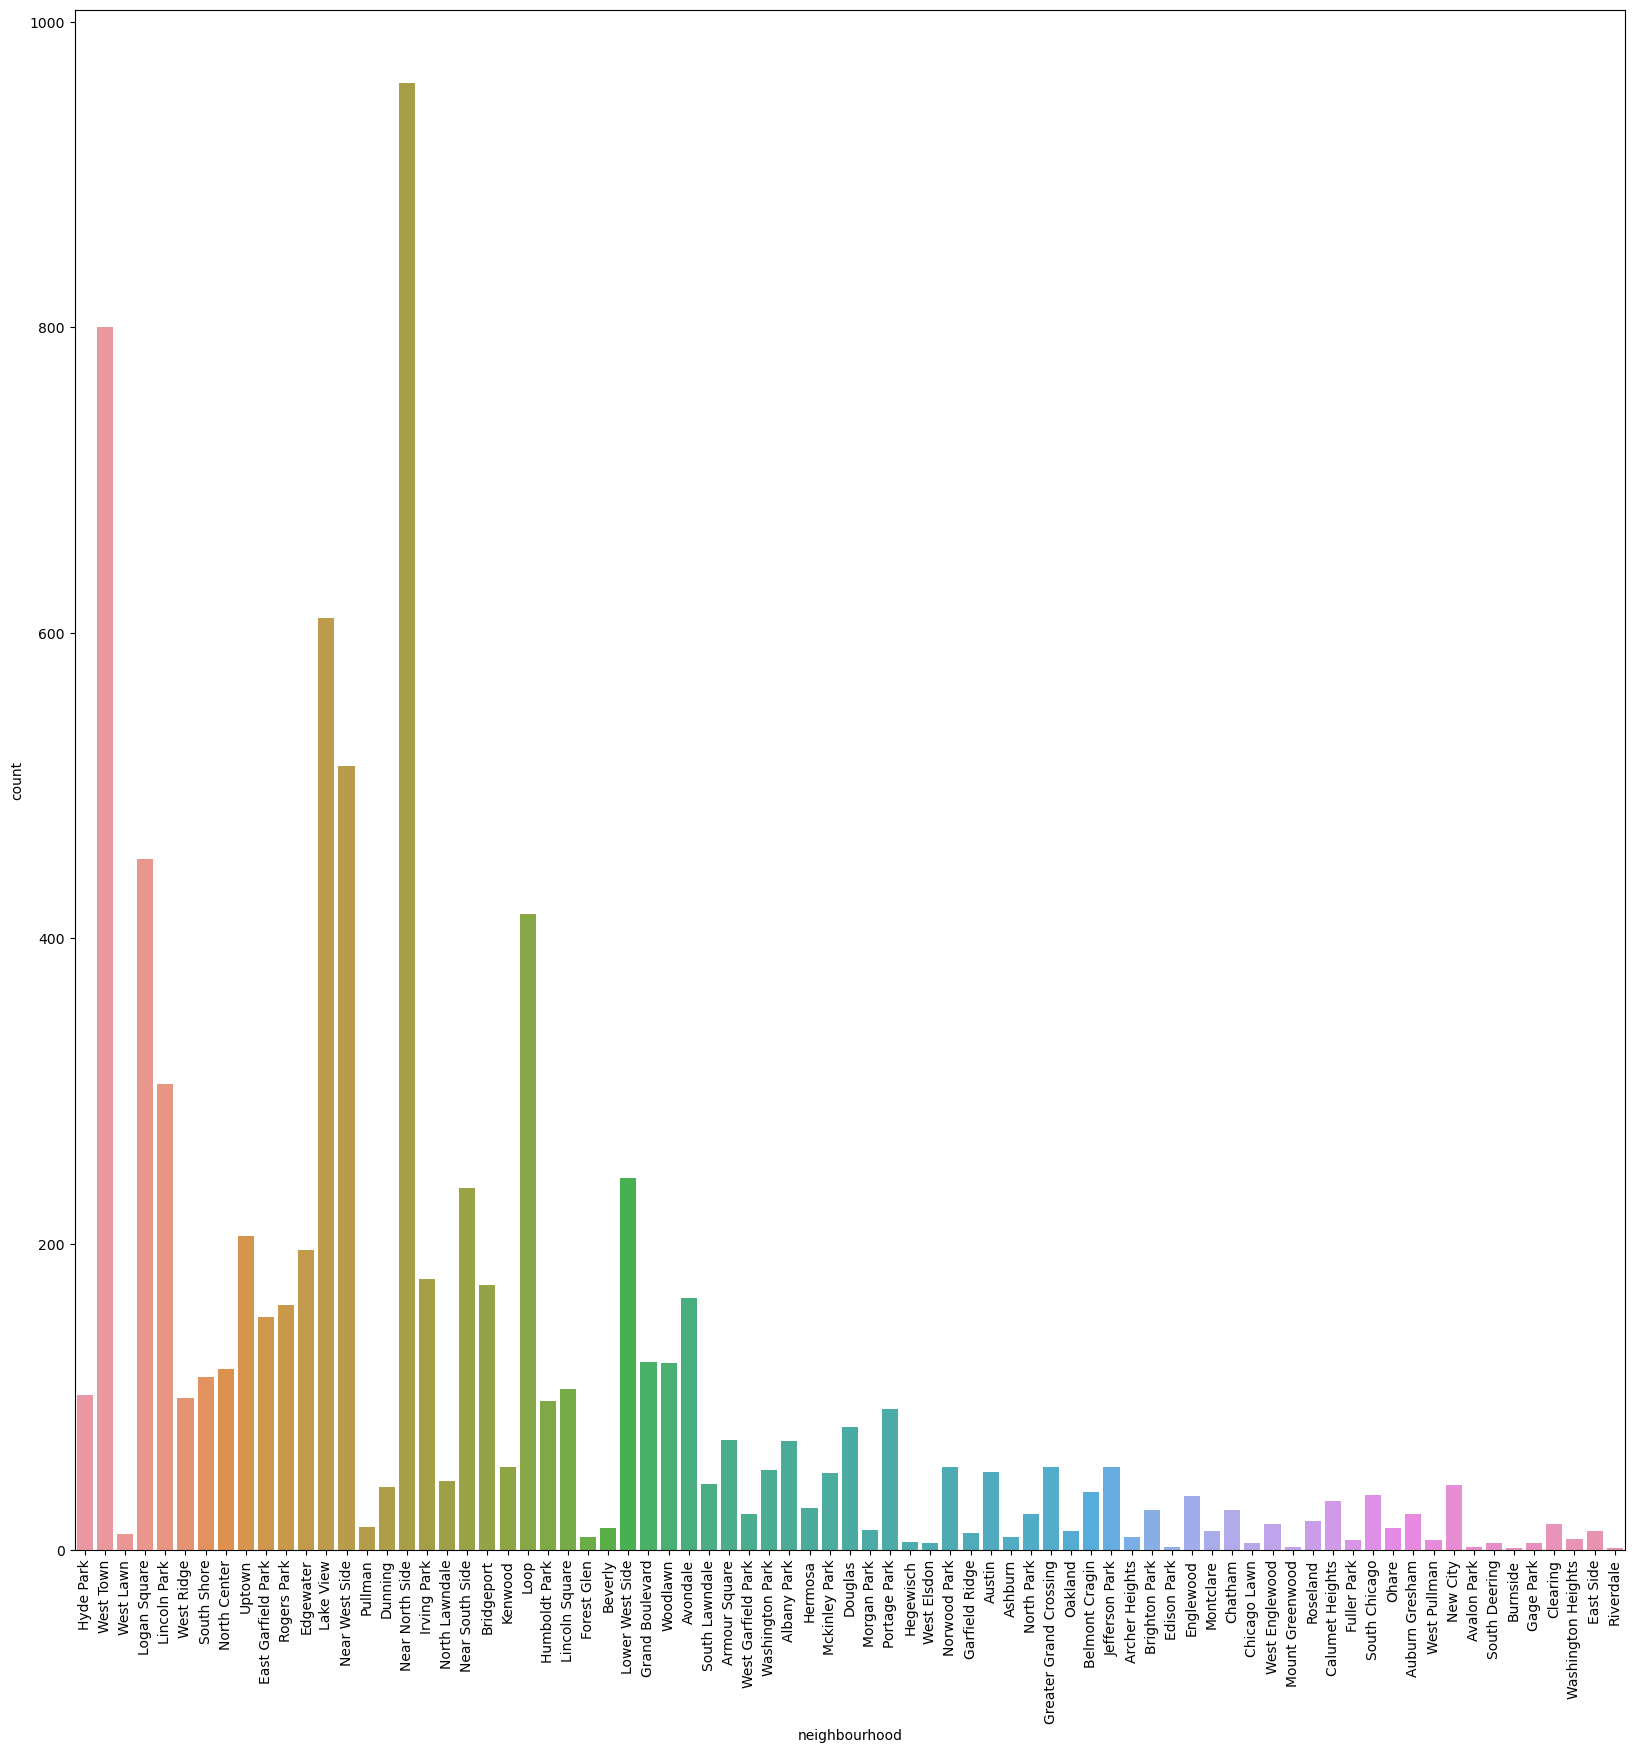

In [38]:
plt.figure(figsize=(20,20))

sns.countplot(x=df['neighbourhood'],data=df)
plt.xticks(rotation=90)
plt.show()

#### Insight:the top five  neighbourhood that people live in it  Near North Side , West Town ,Lake View ,Near West Side,Logan Square       

##### Q:what is the room types that oeople live in it ?

In [39]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

##### Q: what is the counts of each room type ?

In [40]:
df['room_type'].value_counts()

Entire home/apt    6201
Private room       1691
Shared room          84
Hotel room           48
Name: room_type, dtype: int64

##### Q: what is the most type of rooms that people live in it?

<Axes: xlabel='room_type', ylabel='count'>

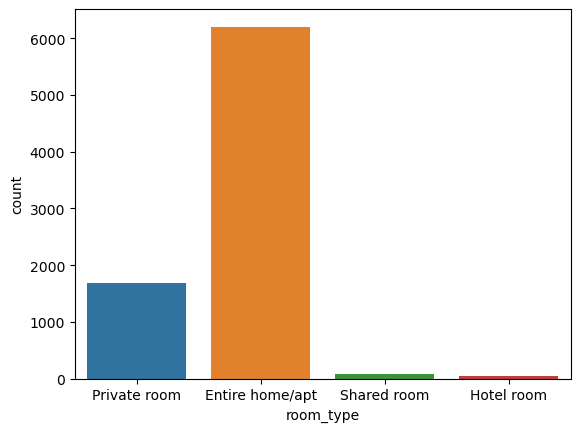

In [41]:
sns.countplot(x='room_type',data=df)

##### Insight:the most type of rooms that people live in it  is Entire home/apt

#### multivariate features

#####  Q:what is the relationship between latitude and longitude?

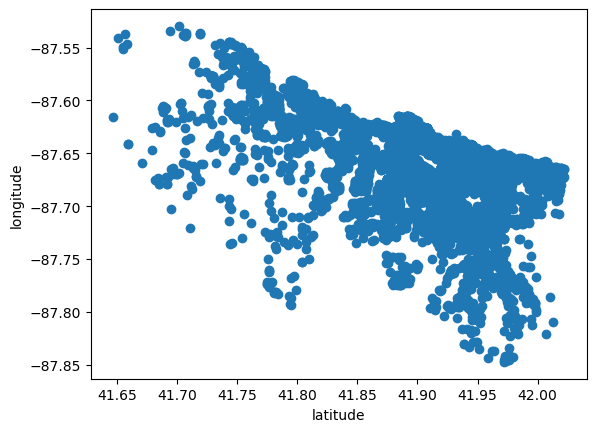

In [42]:
plt.scatter(df['latitude'],df['longitude'])
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

Insight: there is  Negative relationship between latitude and longitude

In [52]:
# sns.scatterplot(x=df['latitude'],y=df['longitude'])

#### Q:what the count of each neighbourhood based on price ?

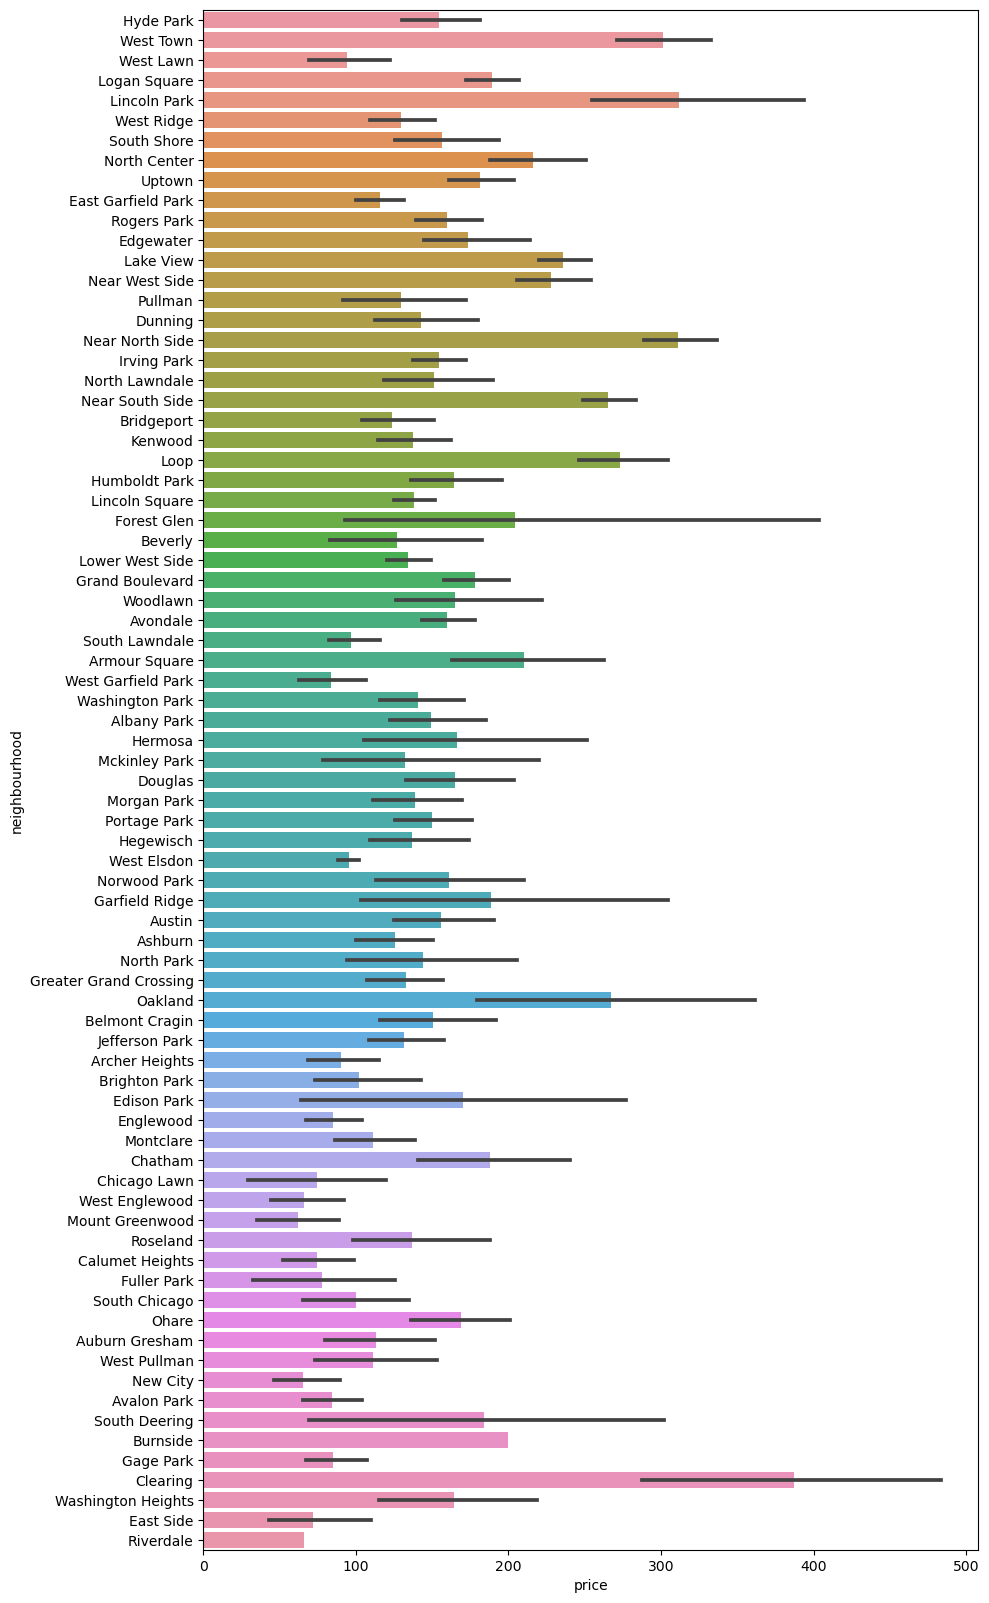

In [43]:
plt.figure(figsize=(10,20))
ax=sns.barplot(x=df['price'],y=df['neighbourhood'],data=df)

#### Insight: this plot shows the counts of each neighbourhood based on price,the most neighbourhood based on price Clearing 

#### Q:what the most type of rooms based on price?

<Axes: xlabel='price', ylabel='room_type'>

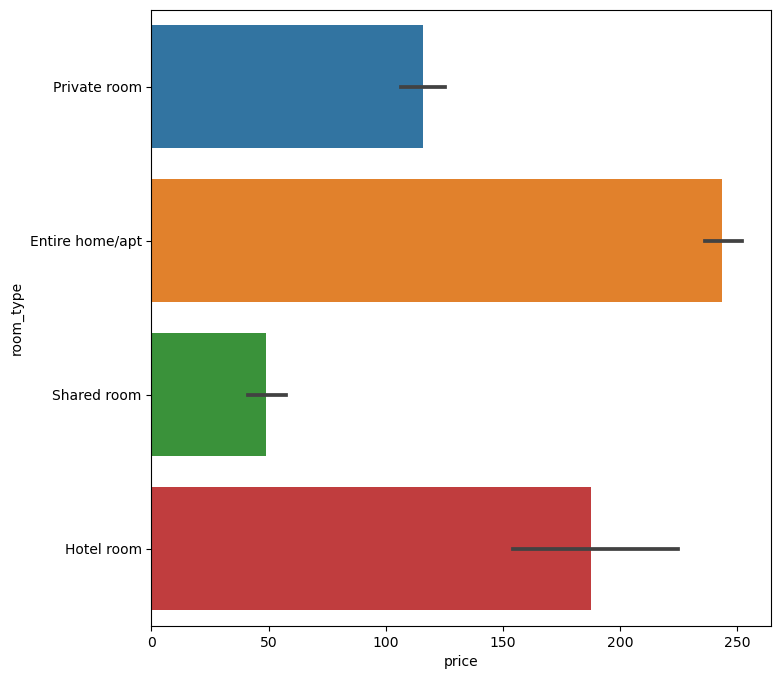

In [44]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['price'],y=df['room_type'],data=df)

##### insight :the most expensive type of room is Entire home/apt

#### Q:what the most type of rooms based on number of reviews?

<Axes: xlabel='number_of_reviews', ylabel='room_type'>

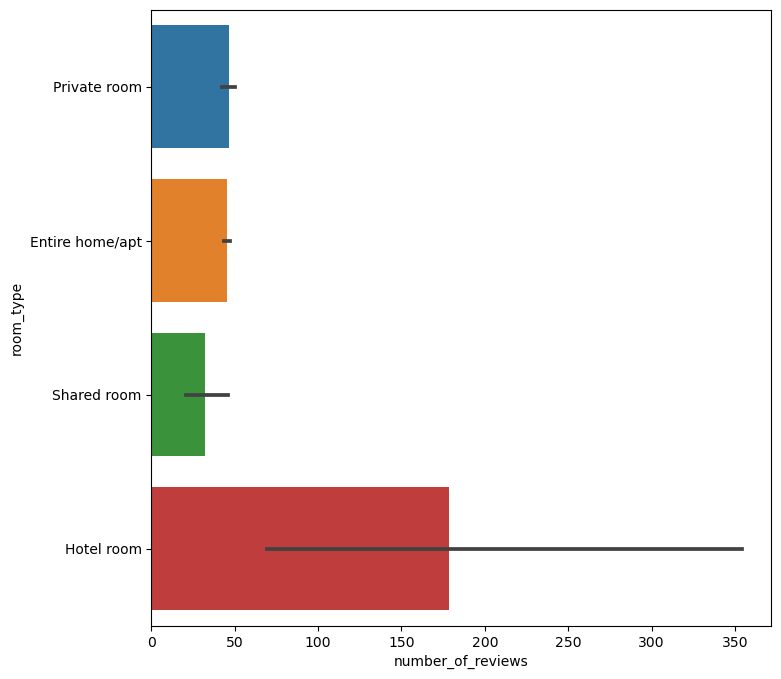

In [45]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['number_of_reviews'],y=df['room_type'],data=df)

##### Insight: the most type of rooms besed on number of  reviews is Hotel room

#### Q:what the most neighbourhood based on number of reviews?

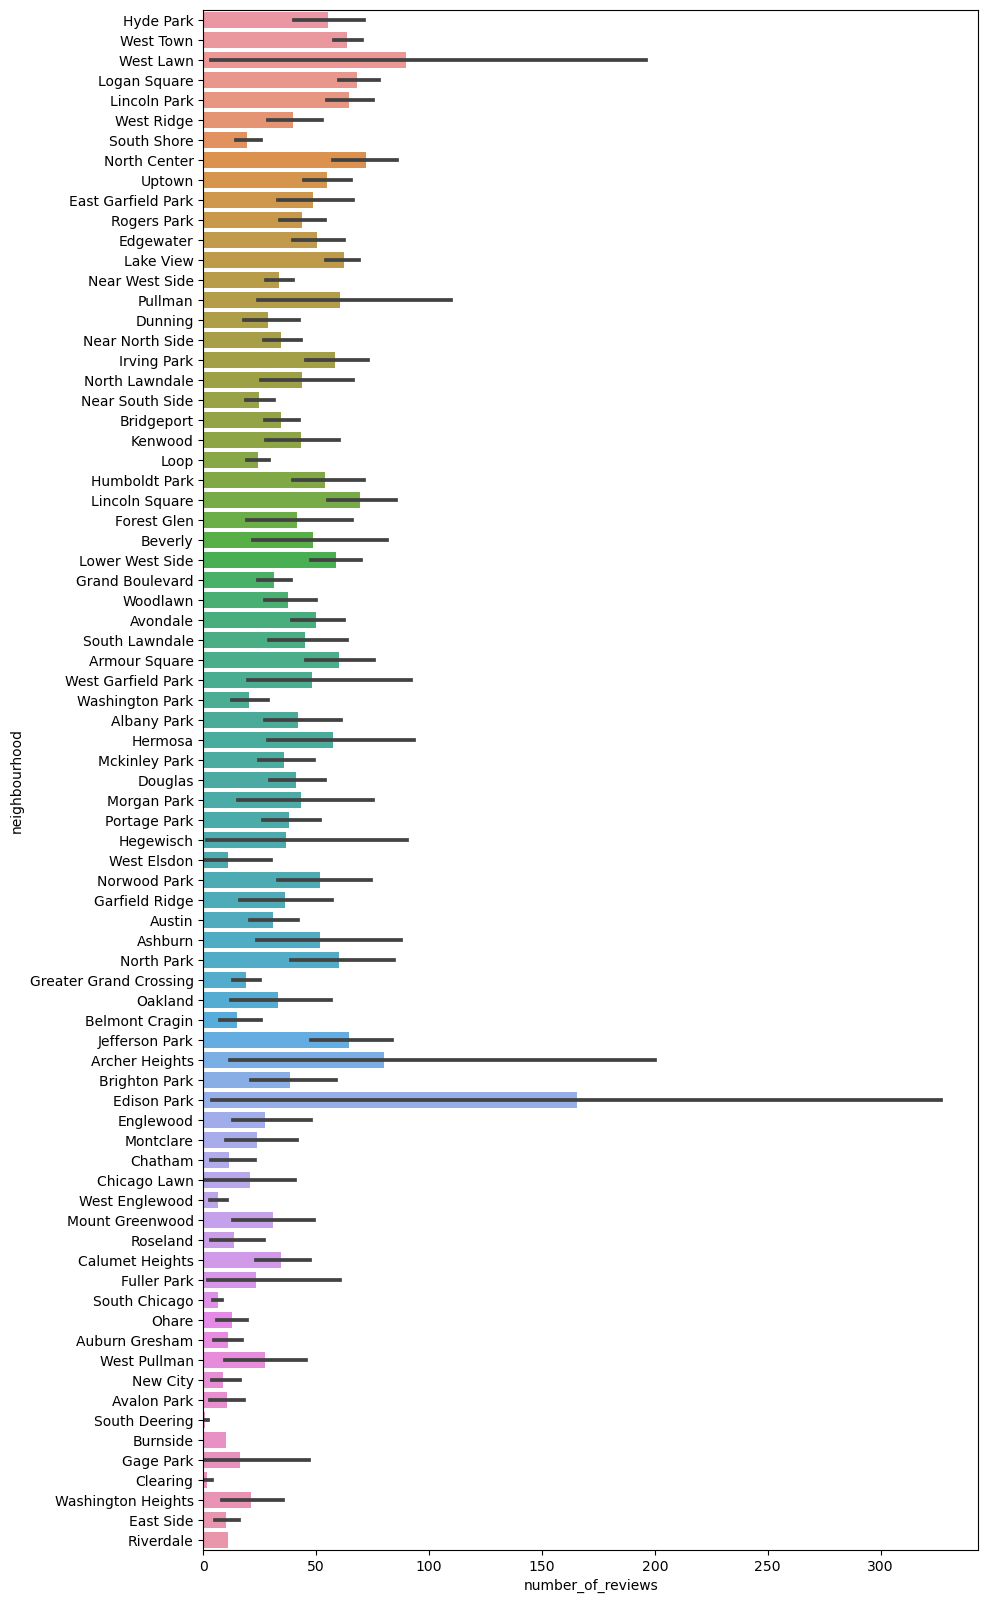

In [46]:
plt.figure(figsize=(10,20))
ax=sns.barplot(x=df['number_of_reviews'],y=df['neighbourhood'],data=df)

##### insight: the most neighbourhood based on number of reviews is Edison park 

#### Q :what is the relationship between price and available days?

<Axes: xlabel='price', ylabel='availability_365'>

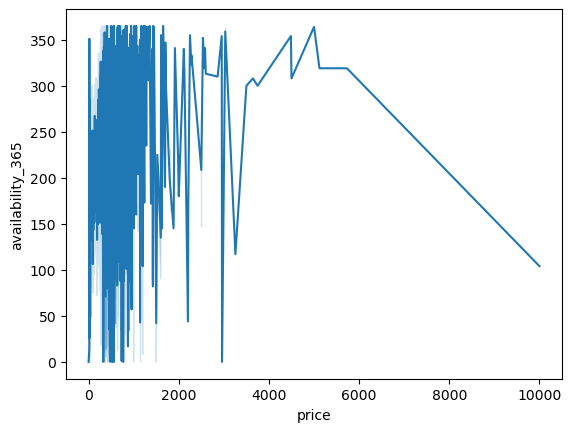

In [47]:
sns.lineplot(x=df['price'],y=df['availability_365'])

#### insight :the most available days in low prices

#### Q:what the most room type based on availabile days?

<Axes: xlabel='availability_365', ylabel='room_type'>

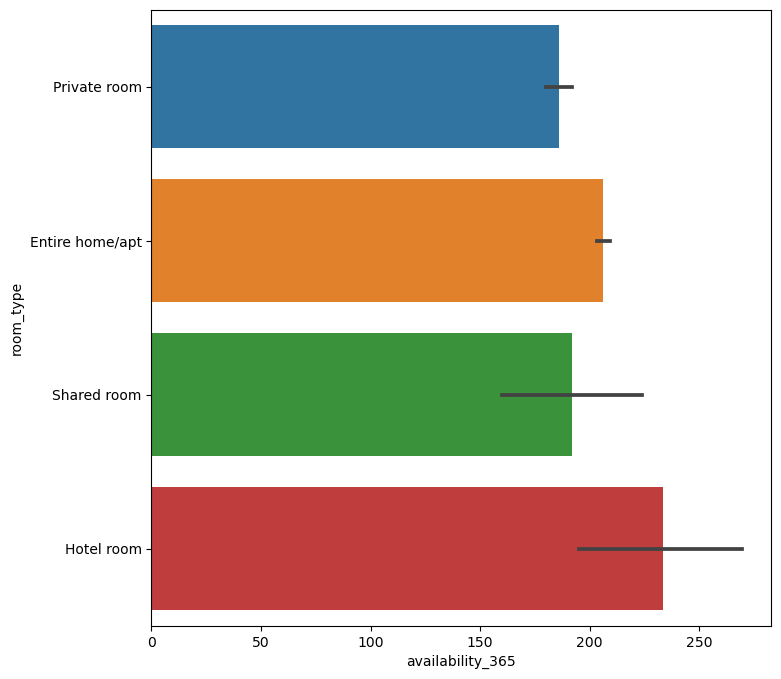

In [48]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['availability_365'],y=df['room_type'],data=df)

#### insight:the most room type based on availabile days is Hotel room 

#### Q: what is the most type based on latitude and longitude?

<Axes: xlabel='latitude', ylabel='longitude'>

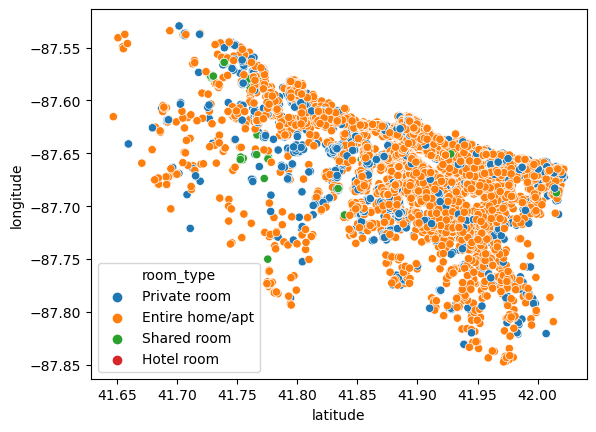

In [49]:
sns.scatterplot(x ='latitude',y = 'longitude' ,hue = 'room_type' ,data = df)

#### insight:the most type based on latitude and longitude is Entire home/apt

##### Q :what is the most number of reviews based on price for each neighbourhood?

In [65]:
# px.scatter(df, x='price', y='number_of_reviews',color='neighbourhood',size='number_of_reviews',size_max=50)
px.scatter(df, x='price', y='number_of_reviews',color='neighbourhood')


#### Insight: the most number of reviews based on price for each neighbourhood  is on low prices 

##### Conclusions: In this project ,I made exploratory data analysis Airbnb listings data for a Chicago city 
* I made data cleaning to the data ready for visulaization
* I performed statistical analysis  on numerical features then visualize these features 
* I performed  analysis  on catecorical features then visualize these features
* I performed  analysis on multivariate features then visualize these features 
* I hope this analysis will help in your decision for your Airbnb in a Chicago city 